# MovieLens Neighborhood Based Recommendation with GraphLab

We first explore an item similiarity neighborhood based approach. This In order to make recommendations for the target movies, the top k movies for users were obtained with two similiarity functions considered -- Pearson Correlation and Cosine Similarity . 

In [7]:
import numpy as np
import pandas as pd
import graphlab
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split,KFold

#prepare the data
r_cols = ['movie_id','itle','genres','user_id', 'rating', 'unix_timestamp']
ratings=pd.read_csv('ratings.csv', sep=',', encoding='latin-1')
movies=graphlab.SFrame.read_csv('movies.csv')
tags=graphlab.SFrame.read_csv('tags.csv')

#split the data into training and validation sets
train, test = train_test_split(ratings, test_size=0.2)
train=graphlab.SFrame(train)
test=graphlab.SFrame(test)


#train the Recommender Model
itemSimModel_pearson = graphlab.item_similarity_recommender.create(train, user_id='userId', item_id='movieId', target='rating', similarity_type='pearson')
itemSimModel_cosine = graphlab.item_similarity_recommender.create(train, user_id='userId', item_id='movieId', target='rating', similarity_type='cosine')
itemSimModel_pearson.evaluate_rmse(test,target='rating')
graphlab.recommender.util.compare_models(test,[itemSimModel_pearson])



Finished parsing file /Users/B.Patel@ibm.com/Downloads/movies.csv

Parsing completed. Parsed 100 lines in 0.046325 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/B.Patel@ibm.com/Downloads/movies.csv

Parsing completed. Parsed 9125 lines in 0.024965 secs.

Finished parsing file /Users/B.Patel@ibm.com/Downloads/tags.csv

Parsing completed. Parsed 100 lines in 0.017662 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/B.Patel@ibm.com/Downloads/tags.csv

Parsing completed. Parsed 1296 lines in 0.014083 secs.

Recsys training: model = item_similarity

Warning: Ignoring columns timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 80003 observations with 671 users and 8368 items.

Data prepared in: 0.107974s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 8.405ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 197.095ms                           | 0                | 4               |

| 1.97s                               | 100              | 8368            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 2.00991s

Recsys training: model = item_similarity

Warning: Ignoring columns timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 80003 observations with 671 users and 8368 items.

Data prepared in: 0.127385s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 5.929ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 166.866ms                           | 0                | 4               |

| 1.14s                               | 100              | 8368            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.17328s

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    |  0.00149476831091 | 2.29964355525e-05 |
|   2    | 0.000747384155456 | 2.29964355525e-05 |
|   3    | 0.000498256103637 | 2.29964355525e-05 |
|   4    | 0.000373692077728 | 2.29964355525e-05 |
|   5    | 0.000298953662182 | 2.29964355525e-05 |
|   6    | 0.000249128051819 | 2.29964355525e-05 |
|   7    |  0.00021353833013 | 2.29964355525e-05 |
|   8    | 0.000186846038864 | 2.29964355525e-05 |
|   9    | 0.000166085367879 | 2.29964355525e-05 |
|   10   | 0.000149476831091 | 2.29964355525e-05 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 1.1601208132503962)

Per User RMSE (best)
+--------+-------+----------------+
| userId | count |      rmse      |
+--------+-------+----------------+
|  341   |   

[{'precision_recall_by_user': Columns:
  	userId	int
  	cutoff	int
  	precision	float
  	recall	float
  	count	int
  
  Rows: 12042
  
  Data:
  +--------+--------+-----------+--------+-------+
  | userId | cutoff | precision | recall | count |
  +--------+--------+-----------+--------+-------+
  |   1    |   1    |    0.0    |  0.0   |   3   |
  |   1    |   2    |    0.0    |  0.0   |   3   |
  |   1    |   3    |    0.0    |  0.0   |   3   |
  |   1    |   4    |    0.0    |  0.0   |   3   |
  |   1    |   5    |    0.0    |  0.0   |   3   |
  |   1    |   6    |    0.0    |  0.0   |   3   |
  |   1    |   7    |    0.0    |  0.0   |   3   |
  |   1    |   8    |    0.0    |  0.0   |   3   |
  |   1    |   9    |    0.0    |  0.0   |   3   |
  |   1    |   10   |    0.0    |  0.0   |   3   |
  +--------+--------+-----------+--------+-------+
  [12042 rows x 5 columns]
  Note: Only the head of the SFrame is printed.
  You can use print_rows(num_rows=m, num_columns=n) to print more ro

In [ ]:
#print sample from model- Top 3 for first 10 entries
itemSimModel_pearson.recommend(users=range(1,11),k=10)


# Evaluation Metrics & Interactive View of Model 

We can see below that the Pearson Correlation evaluation method has a smaller RMSE than the cosine correlation as the Pearson Correlation Coefficient takes into account the differences in users' rating scales.

In [25]:
pearson_eval = itemSimModel_pearson.evaluate(test)



Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    |  0.00149476831091 | 2.29964355525e-05 |
|   2    | 0.000747384155456 | 2.29964355525e-05 |
|   3    | 0.000498256103637 | 2.29964355525e-05 |
|   4    | 0.000373692077728 | 2.29964355525e-05 |
|   5    | 0.000298953662182 | 2.29964355525e-05 |
|   6    | 0.000249128051819 | 2.29964355525e-05 |
|   7    |  0.00021353833013 | 2.29964355525e-05 |
|   8    | 0.000186846038864 | 2.29964355525e-05 |
|   9    | 0.000166085367879 | 2.29964355525e-05 |
|   10   | 0.000149476831091 | 2.29964355525e-05 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 1.1601208132503962)

Per User RMSE (best)
+--------+-------+----------------+
| userId | count |      rmse      |
+--------+-------+----------------+
|  341   |   1   | 0.021978021978 |
+----

In [26]:
cosine_eval = itemSimModel_cosine.evaluate(test) 



Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    | 0.331838565022 | 0.0216023620033 |
|   2    | 0.299701046338 | 0.0369230315625 |
|   3    | 0.292974588939 | 0.0526164400396 |
|   4    | 0.278774289985 | 0.0639272399379 |
|   5    | 0.269955156951 | 0.0757610955558 |
|   6    | 0.26033881415  | 0.0878502581029 |
|   7    | 0.250907537903 | 0.0992577163897 |
|   8    | 0.243086696562 |  0.110956499886 |
|   9    | 0.235841222388 |  0.12149089931  |
|   10   | 0.229596412556 |  0.129020236725 |
+--------+----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 3.597016790645389)

Per User RMSE (best)
+--------+-------+---------------+
| userId | count |      rmse     |
+--------+-------+---------------+
|  191   |   4   | 1.12241227069 |
+--------+-------+---------------+
[1 rows x 3 columns]


Per User RMSE (worst)


The following visualization provides a working interface of the model that recommends movies to an individual as well as provides a list of movies that may be liked given a movie of interest.

In [ ]:
view = itemSimModel_pearson.views.overview(
        validation_set=test,
        item_data=movies)

view.show()


While neighborhood based collaborative filtering is effective, it's strong suit is not its scalability. Thus we will conclude with a brief introduction to a model based approach as it compares to the neighborhood approach. The model based approach will be built and tuned as we attempt to minimize its RMSE for our conclusion.

# Ranking Factorization

A RankingFactorizationRecommender "learns latent factors for each user and item and uses them to rank recommended items according to the likelihood of observing those (user, item) pairs. This is commonly desired when performing collaborative filtering for implicit feedback datasets or datasets with explicit ratings for which ranking prediction is desired."

In [37]:
#Naive factorization Model
m1 = graphlab.ranking_factorization_recommender.create(train,  user_id='userId', item_id='movieId', target='rating')

m1.recommend(users=range(1,11),k=10)

#The following produces the ratings matrix for the given ranking factor recommender
#m1.predict(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 80003 observations with 671 users and 8368 items.

Data prepared in: 0.158135s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 80003 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 16.6667           | Not Viable                               |

| 1       | 4.16667           | Not Viable                               |

| 2       | 1.04167           | Not Viable                               |

| 3       | 0.260417          | Not Viable                               |

| 4       | 0.0651042         | 1.39496                                  |

| 5       | 0.0325521         | 1.83373                                  |

| 6       | 0.016276          | 1.66158                                  |

| 7       | 0.00813802        | 1.82139                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0651042         | 1.39496                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 120us        | 2.1948            | 1.05803               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 207.948ms    | 1.97718           | 1.10595               | 0.0651042   |

| 2       | 403.888ms    | 1.84122           | 1.0685                | 0.0651042   |

| 3       | 604.695ms    | 1.64445           | 0.994219              | 0.0651042   |

| 4       | 825.894ms    | 1.53733           | 0.949186              | 0.0651042   |

| 5       | 1.14s        | 1.47099           | 0.92828               | 0.0651042   |

| 6       | 1.38s        | 1.43148           | 0.909478              | 0.0651042   |

| 10      | 2.54s        | 1.29103           | 0.859021              | 0.0651042   |

| 11      | 2.74s        | 1.26239           | 0.847613              | 0.0651042   |

| 15      | 3.74s        | 1.16099           | 0.805294              | 0.0651042   |

| 20      | 5.22s        | 1.06836           | 0.763074              | 0.0651042   |

| 25      | 6.62s        | 0.985311          | 0.727917              | 0.0651042   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.960936

Final training RMSE: 0.701271

userId,movieId,score,rank
1,608,5.19707589422,1
1,318,5.11342441117,2
1,296,5.00796084677,3
1,50,5.00238882576,4
1,1148,4.97067444597,5
1,1617,4.93443494116,6
1,260,4.90047614847,7
1,720,4.77197073971,8
1,2858,4.75682698761,9
1,527,4.71132092749,10


In [10]:
#Model with movie information
m2 = graphlab.ranking_factorization_recommender.create(train,  user_id='userId', item_id='movieId', item_data=movies, target='rating')
m2.recommend(users=range(1,11))

#The following produces the ratings matrix for the given ranking factor recommender that adds movie genres as a side feature
#m2.predict(test)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 80003 observations with 671 users and 9125 items.

Data prepared in: 0.202145s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 80003 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 10                | Not Viable                               |

| 1       | 2.5               | Not Viable                               |

| 2       | 0.625             | Not Viable                               |

| 3       | 0.15625           | 0.667489                                 |

| 4       | 0.078125          | 0.74713                                  |

| 5       | 0.0390625         | 0.933719                                 |

| 6       | 0.0195312         | 1.37097                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.15625           | 0.667489                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 91us         | 2.195             | 1.058                 |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 412.159ms    | DIVERGED          | DIVERGED              | 0.15625     |

| RESET   | 559.117ms    | 2.19484           | 1.05798               |             |

| 1       | 981.285ms    | 1.75373           | 1.03978               | 0.078125    |

| 2       | 1.25s        | 1.3241            | 0.871188              | 0.078125    |

| 3       | 1.52s        | 1.10502           | 0.759165              | 0.078125    |

| 4       | 1.83s        | 0.97312           | 0.697667              | 0.078125    |

| 5       | 2.11s        | 0.872776          | 0.649657              | 0.078125    |

| 6       | 2.39s        | 0.803809          | 0.610787              | 0.078125    |

| 9       | 3.18s        | 0.708865          | 0.608399              | 0.078125    |

| 11      | 3.83s        | 0.584753          | 0.536372              | 0.078125    |

| 14      | 4.90s        | 0.502089          | 0.483521              | 0.078125    |

| 19      | 6.37s        | 0.546604          | 0.494676              | 0.078125    |

| 24      | 7.83s        | 0.448689          | 0.442857              | 0.078125    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.411573

Final training RMSE: 0.392412

userId,movieId,score,rank
1,899,4.6849898306,1
1,260,4.24750616227,2
1,50,4.23813507532,3
1,608,4.23454047752,4
1,838,4.23394960736,5
1,1028,4.17189442192,6
1,17,4.14456035768,7
1,593,4.13577984099,8
1,910,4.06997211848,9
1,497,4.06237465714,10


In [11]:
#Model with tag information
m3 = graphlab.ranking_factorization_recommender.create(train,  user_id='userId', item_id='movieId', item_data=tags, target='rating')
m3.recommend(users=range(1,11),k=10)

#The following produces the ratings matrix for the given ranking factor recommender that adds movie tags as a side feature
#m3.predict(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 80003 observations with 671 users and 8436 items.

Data prepared in: 0.151322s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 80003 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 8.33333           | Not Viable                               |

| 1       | 2.08333           | Not Viable                               |

| 2       | 0.520833          | Not Viable                               |

| 3       | 0.130208          | Not Viable                               |

| 4       | 0.0325521         | No Decrease (59.8197 >= 2.1645)          |

| 5       | 0.00813802        | No Decrease (2.26322 >= 2.1645)          |

| 6       | 0.00203451        | 2.01945                                  |

| 7       | 0.00101725        | 2.09608                                  |

| 8       | 0.000508626       | 2.13809                                  |

| 9       | 0.000254313       | 2.15277                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00203451        | 2.01945                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 117us        | 2.1948            | 1.05801               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 218.805ms    | 2.08687           | 1.03503               | 0.00203451  |

| 2       | 434.969ms    | 1.98841           | 1.01744               | 0.00203451  |

| 3       | 668.333ms    | 1.95364           | 1.01351               | 0.00203451  |

| 4       | 890.269ms    | 1.94185           | 1.01409               | 0.00203451  |

| 5       | 1.10s        | 1.94033           | 1.01621               | 0.00203451  |

| 6       | 1.36s        | 1.94312           | 1.02096               | 0.00203451  |

| 10      | 2.18s        | 1.99014           | 1.04743               | 0.00203451  |

| 11      | 2.39s        | 2.0079            | 1.05723               | 0.00203451  |

| 15      | 3.22s        | 2.07179           | 1.0923                | 0.00203451  |

| 20      | 4.29s        | 2.06474           | 1.09557               | 0.00203451  |

| 25      | 5.34s        | 2.05081           | 1.09579               | 0.00203451  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 2.05042

Final training RMSE: 1.09361

userId,movieId,score,rank
1,37729,6.7399329727,1
1,34162,6.47691071487,2
1,45950,6.30934178751,3
1,858,5.9776759635,4
1,7153,5.87264213806,5
1,4993,5.83330133201,6
1,35957,5.78989033252,7
1,2571,5.74160243013,8
1,318,5.70079463608,9
1,5952,5.65537261732,10


In [12]:

#Model that pushes predicted ratings of unobserved user-item pairs toward 1 or below with movie genres as side feature
m4=  graphlab.ranking_factorization_recommender.create(train,  user_id='userId', item_id='movieId', item_data=movies, target='rating', unobserved_rating_value = 1)

m4.recommend(users=range(1,11),k=10)

#The following produces the ratings matrix for the given ranking factor recommender 
#m.4predict(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 80003 observations with 671 users and 9125 items.

Data prepared in: 0.181043s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| unobserved_rating_value        | Ranking Target Rating for Unobserved Interacti...| 1        |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 80003 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 10                | Not Viable                               |

| 1       | 2.5               | Not Viable                               |

| 2       | 0.625             | Not Viable                               |

| 3       | 0.15625           | Not Viable                               |

| 4       | 0.0390625         | 1.35711                                  |

| 5       | 0.0195312         | 1.81429                                  |

| 6       | 0.00976562        | 2.11618                                  |

| 7       | 0.00488281        | 2.32361                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0390625         | 1.35711                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 87us         | 2.73704           | 1.05801               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 411.734ms    | 2.091             | 1.03545               | 0.0390625   |

| 2       | 712.31ms     | 1.82751           | 0.967903              | 0.0390625   |

| 3       | 1.00s        | 1.69705           | 0.920671              | 0.0390625   |

| 4       | 1.30s        | 1.59261           | 0.878856              | 0.0390625   |

| 5       | 1.60s        | 1.50835           | 0.853777              | 0.0390625   |

| 6       | 1.89s        | 1.41855           | 0.816061              | 0.0390625   |

| 10      | 2.99s        | 1.14282           | 0.72151               | 0.0390625   |

| 11      | 3.26s        | 1.08798           | 0.702878              | 0.0390625   |

| 15      | 4.38s        | 1.06783           | 0.735523              | 0.0390625   |

| 20      | 5.77s        | 0.832079          | 0.609746              | 0.0390625   |

| 25      | 7.33s        | 0.738935          | 0.566795              | 0.0390625   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.710077

Final training RMSE: 0.538666

userId,movieId,score,rank
1,260,5.0640205202,1
1,1196,4.6197308061,2
1,296,4.61905713392,3
1,1028,4.36236293067,4
1,589,4.35540384625,5
1,908,4.35508050595,6
1,1035,4.27489547164,7
1,594,4.27439259564,8
1,1210,4.26430707251,9
1,541,4.24750422512,10


In [13]:

#Model that pushes predicted ratings of unobserved user-item pairs toward 1 or below with tags as side feature
m5=  graphlab.ranking_factorization_recommender.create(train,  user_id='userId', item_id='movieId', item_data=tags, target='rating', unobserved_rating_value = 1)

m5.recommend(users=range(1,11),k=10)

#The following produces the ratings matrix for the given ranking factor recommender 
#m5.predict(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 80003 observations with 671 users and 8436 items.

Data prepared in: 0.152973s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| unobserved_rating_value        | Ranking Target Rating for Unobserved Interacti...| 1        |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 80003 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 8.33333           | Not Viable                               |

| 1       | 2.08333           | Not Viable                               |

| 2       | 0.520833          | Not Viable                               |

| 3       | 0.130208          | Not Viable                               |

| 4       | 0.0325521         | Not Viable                               |

| 5       | 0.00813802        | 2.54533                                  |

| 6       | 0.00406901        | 2.43043                                  |

| 7       | 0.00203451        | 2.51436                                  |

| 8       | 0.00101725        | 2.63319                                  |

| 9       | 0.000508626       | 2.68022                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00406901        | 2.43043                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 105us        | 2.7368            | 1.05801               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 247.653ms    | 2.55122           | 1.04204               | 0.00406901  |

| 2       | 574.928ms    | 2.51971           | 1.06146               | 0.00406901  |

| 3       | 797.866ms    | 2.65415           | 1.14072               | 0.00406901  |

| 4       | 1.14s        | 2.65449           | 1.14894               | 0.00406901  |

| 5       | 1.35s        | 2.67226           | 1.16626               | 0.00406901  |

| 6       | 1.57s        | 2.67766           | 1.17566               | 0.00406901  |

| 10      | 2.37s        | 2.85343           | 1.26962               | 0.00406901  |

| 11      | 2.58s        | 2.92363           | 1.30002               | 0.00406901  |

| 14      | 3.54s        | DIVERGED          | DIVERGED              | 0.00406901  |

| RESET   | 3.71s        | 2.73673           | 1.058                 |             |

| 1       | 3.91s        | 2.5947            | 1.03592               | 0.00203451  |

| 6       | 5.58s        | 2.34477           | 1.01632               | 0.00203451  |

| 11      | 6.99s        | 2.29379           | 1.01627               | 0.00203451  |

| 16      | 8.35s        | 2.279             | 1.0144                | 0.00203451  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached (hard limit).

Computing final objective value and training RMSE.

Final objective value: 2.2756

Final training RMSE: 1.01522

userId,movieId,score,rank
1,260,4.11746645225,1
1,50,4.11475411468,2
1,608,3.95126862166,3
1,296,3.92786297155,4
1,318,3.80972273693,5
1,1089,3.79754195841,6
1,111,3.78791366017,7
1,527,3.74968918239,8
1,364,3.73783869328,9
1,1219,3.73299343723,10


In [20]:
#m1.evaluate_rmse(test,target='rating')  #'rmse_overall': 1.1997219768416447

#m2.evaluate_rmse(test,target='rating') #'rmse_overall': 1.5102909960735822

#m3.evaluate_rmse(test,target='rating') #'rmse_overall': 1.1110787691981734

#m4.evaluate_rmse(test,target='rating') #'rmse_overall': 1.467256102591114

#m5.evaluate_rmse(test,target='rating') #'rmse_overall': 1.0224394708220514

The model is trained with Stochastic Gradient Descent and automaticlly takes in a ranking regularization term set to be .25. According to Turi, "When ranking_regularization is larger than zero, the model samples a small set of unobserved user-item pairs and attempts to drive their rating predictions below the value specified with unobserved_rating_value. This has the effect of improving the precision-recall performance of recommended items." However, given our explicit ratings, this term should be minimized.

Adjusting this paramter [0,1] keeping all else equal using m5 as the desired model of contination as it minimizes RMSE we obtain the following plot that supports this intuition. Therefore we conclude with the final adjusted ranking factorization model, m_star.

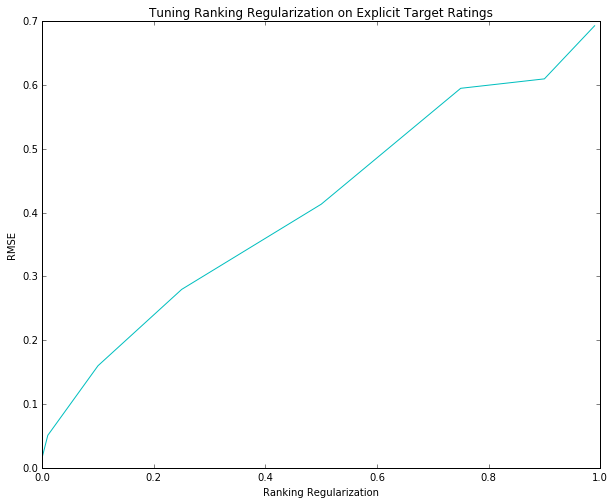

In [24]:
x=np.array([0,.01,.1,.25,.5,.75,.9,.99])
y=np.array([.016460668430915367,.05088695106015607,.16003760731422528,0.27976936252929974,.4133214077837332,.5950865397988541,.6098885076702547,.6931611640547327])
plt.figure(figsize=(10,8))
plt.plot(x,y,'c')

plt.title('Tuning Ranking Regularization on Explicit Target Ratings')
plt.xlabel('Ranking Regularization')
plt.ylabel('RMSE')
    
plt.show()


In [23]:
m_star=  graphlab.ranking_factorization_recommender.create(train,  user_id='userId', item_id='movieId', item_data=tags, target='rating', unobserved_rating_value = 1, ranking_regularization=0)
m_star.evaluate_rmse(test,target='rating') # 'rmse_overall': 1.064844763280207

view = m_star.views.overview(
        validation_set=test,
        item_data=movies)

view.show()

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 80003 observations with 671 users and 8436 items.

Data prepared in: 0.167691s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 80003 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 8.33333           | Not Viable                               |

| 1       | 2.08333           | Not Viable                               |

| 2       | 0.520833          | Not Viable                               |

| 3       | 0.130208          | Not Viable                               |

| 4       | 0.0325521         | Not Viable                               |

| 5       | 0.00813802        | No Decrease (1.25115 >= 1.10009)         |

| 6       | 0.00203451        | 1.04351                                  |

| 7       | 0.00101725        | 1.06521                                  |

| 8       | 0.000508626       | 1.08574                                  |

| 9       | 0.000254313       | 1.09364                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00203451        | 1.04351                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 108us        | 1.11939           | 1.05801               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 142.239ms    | 1.0789            | 1.0387                | 0.00203451  |

| 2       | 258.745ms    | 1.02582           | 1.01283               | 0.00203451  |

| 3       | 470.471ms    | 1.0028            | 1.0014                | 0.00203451  |

| 4       | 593.426ms    | 0.996136          | 0.998066              | 0.00203451  |

| 5       | 763.801ms    | 0.998036          | 0.999018              | 0.00203451  |

| 6       | 980.086ms    | 1.01177           | 1.00587               | 0.00203451  |

| 10      | 1.56s        | 1.18486           | 1.08851               | 0.00203451  |

| 11      | 1.67s        | 1.27756           | 1.13029               | 0.00203451  |

| 14      | 2.19s        | DIVERGED          | DIVERGED              | 0.00203451  |

| RESET   | 2.24s        | 1.1193            | 1.05797               |             |

| 6       | 3.13s        | 1.02583           | 1.01283               | 0.00101725  |

| 16      | 4.28s        | 1.04044           | 1.02002               | 0.00101725  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached (hard limit).

Computing final objective value and training RMSE.

Final objective value: 1.04529

Final training RMSE: 1.02239

# Summary

Model m_star has a RMSE that is .1 smaller than the more naive Pearson Correlation item similiarity model that was considered in the beginning. A summary of the three models, PCC item similiarity, Cosine item similarity, and m_star (a tuned ranking factorization model) and their respective RMSEs are highlighted below. We can see that while m_star has the lowest RMSE, PCC and m_star do not differ greatly. However, the scalability of m_star is greater than the PCC item similarity approach. 

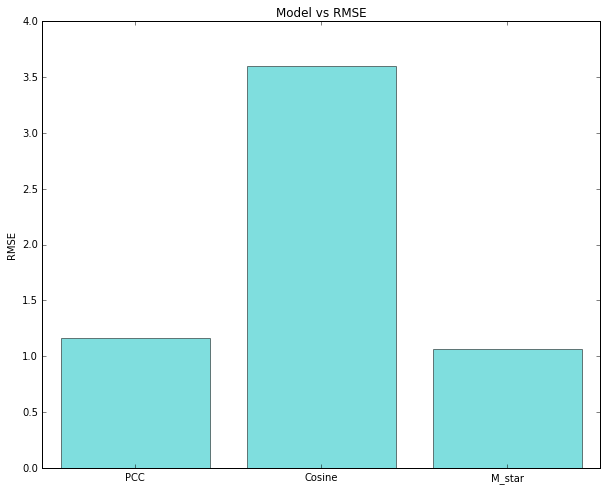

In [36]:
objects = ('PCC', 'Cosine', 'M_star')
y_pos = np.arange(len(objects))
performance = [1.1601208132503962, 3.597016790645389,1.064844763280207]
plt.figure(figsize=(10,8))
plt.bar(y_pos, performance, align='center', alpha=0.5, color='c')
plt.xticks(y_pos, objects)
plt.ylabel('RMSE')
plt.title('Model vs RMSE')
plt.show()
